In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Advertising.csv',index_col=[0])
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


# Q1. Explain the dataset

In [3]:
 data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Features: 

    TV : Advertising amount spend on TV for a single product in a given market 
    
    Radio : Advertising amount spend on Radio for a single product in a given market 
    
    Newspaper: Advertising amount spend on Newspaper for a single product in a given market

Response: 

    Sales: sales of a product in agiven market

In [4]:
data.shape

(200, 4)

There are 200 observations, and thus 200 markets in the dataset.

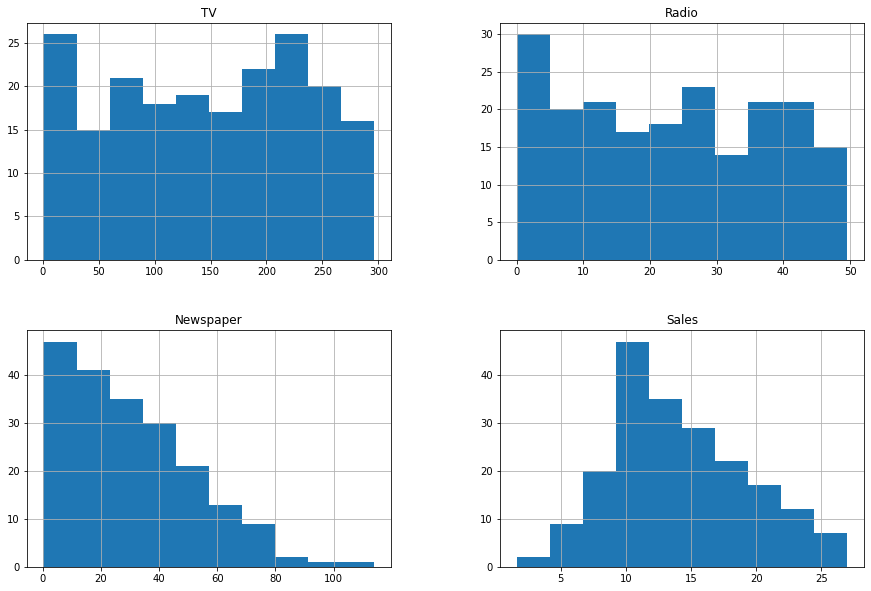

In [5]:
freqgraph=data.select_dtypes(include=['int32','int64','float'])
freqgraph.hist(figsize=(15,10))
plt.show()

Newspaper is right skewed,TV and Radio are normally distributed

# Q2. Check Summary  statistics, and discuss maximum, minimum, average, median, percentaile

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

In [8]:
n1=np.percentile(data['TV'],75)
n2=np.percentile(data['Radio'],75)
n3=np.percentile(data['Newspaper'],75)
n4=np.percentile(data['Sales'],75)
print('The 75th percentile of TV is',n1)
print('The 75th percentile of Radio is',n2)
print('The 75th percentile of Newspaper is',n3)
print('The 75th percentile of Sales is',n4)

The 75th percentile of TV is 218.825
The 75th percentile of Radio is 36.525
The 75th percentile of Newspaper is 45.1
The 75th percentile of Sales is 17.4


# Q3. Draw a scatter plot between TV and sales and write your insights

<function matplotlib.pyplot.show(close=None, block=None)>

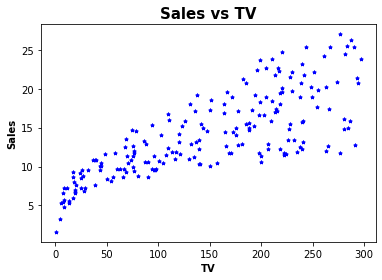

In [9]:
plt.scatter(data['TV'],data['Sales'],s=12,color='blue',marker='*')
plt.title('Sales vs TV',fontsize=15,fontweight='bold')
plt.xlabel('TV',fontsize=10,fontweight='bold')
plt.ylabel('Sales',fontsize=10,fontweight='bold')
plt.show

 We can understand this is postive correrealtion , that is Sales increases as per TV Advertisement

# Q4. Do a correlation analysis on the data set

In [10]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<AxesSubplot:>

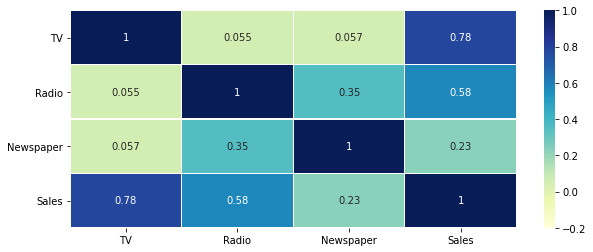

In [11]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=-.2, vmax=1,annot=True,linewidths=.2,cmap='YlGnBu')

This shows that there is strong correlation between TV and Sale, moderate correaltion between radio and sale, and a weak coorealtion between newspaper and Sales

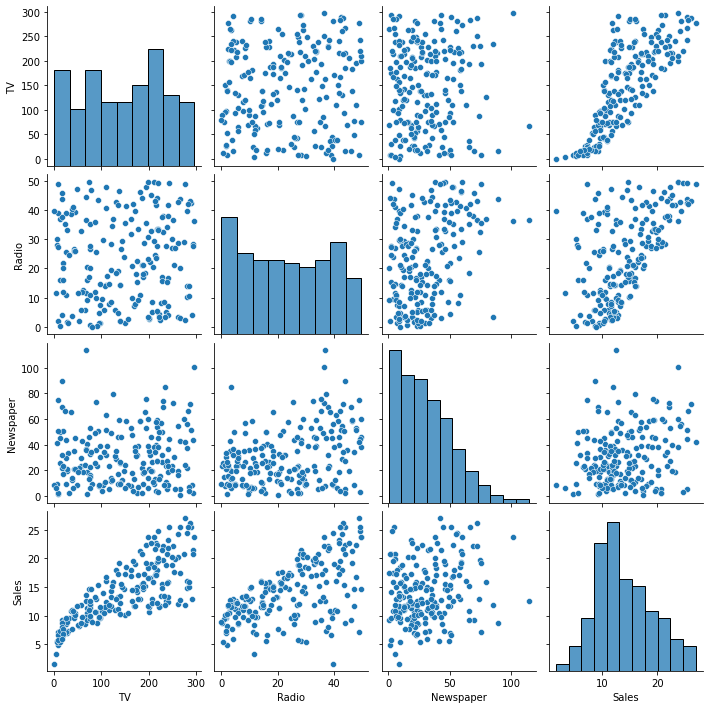

In [12]:
sns.pairplot(data)

This also depicts the strong correaltion between TV and Sales

In [13]:
y=data['Sales']
X=data.drop(['Sales'],axis=1)


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size=.25)

In [15]:
from sklearn import linear_model

In [16]:
lr = linear_model.LinearRegression()

In [17]:
model = lr.fit(X_train, y_train)

In [18]:
predictions = model.predict(X_test)

In [19]:
print(y_test)

113    14.1
166    11.9
13      9.2
74     11.0
145    11.4
21     18.0
200    13.4
9       4.8
40     21.5
89     12.9
82     12.3
198    12.8
70     22.3
161    14.4
26     12.0
100    17.2
152    11.6
24     15.5
139     9.6
160    12.9
90     16.7
83     11.3
25      9.7
175    11.5
138    20.8
84     13.6
108     8.7
35      9.5
98     15.5
168    12.2
124    15.2
158    10.1
76      8.7
153    16.6
118     9.4
150    10.1
64     14.0
55     20.2
126    10.6
81     11.8
171     8.4
184    26.2
39     10.1
154    19.0
41     16.6
191    10.8
178    11.7
132    12.7
14      9.7
122     7.0
Name: Sales, dtype: float64


In [20]:
print(predictions)

[13.80954103 14.6637734  10.53594392  9.94329962 10.09102145 18.2826515
 15.23069647  3.47866075 20.50438323 11.82515208 14.86548863 12.75766989
 21.10572152 14.26282047 15.77765346 16.92664868 10.11145055 16.65119387
  9.57080112 12.41197562 16.87911139 10.10036502  8.01212084 13.82886497
 21.13119665 14.26150559  7.07888394  7.47332175 15.35058814 13.45058622
 14.92030561 10.06422658 11.8881704  16.34487067  6.48117542  9.63271238
 13.02065077 20.43280794  9.06454018 11.29775128  7.24854645 24.43738014
  9.77744347 18.22599771 16.45502802 12.16207576 12.26675531 15.86193806
  8.70368066  7.76559449]


In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 2.1201664625608125


The average squared difference between the estimated values and the actual value is 12.796

Plotting Least Square Lines

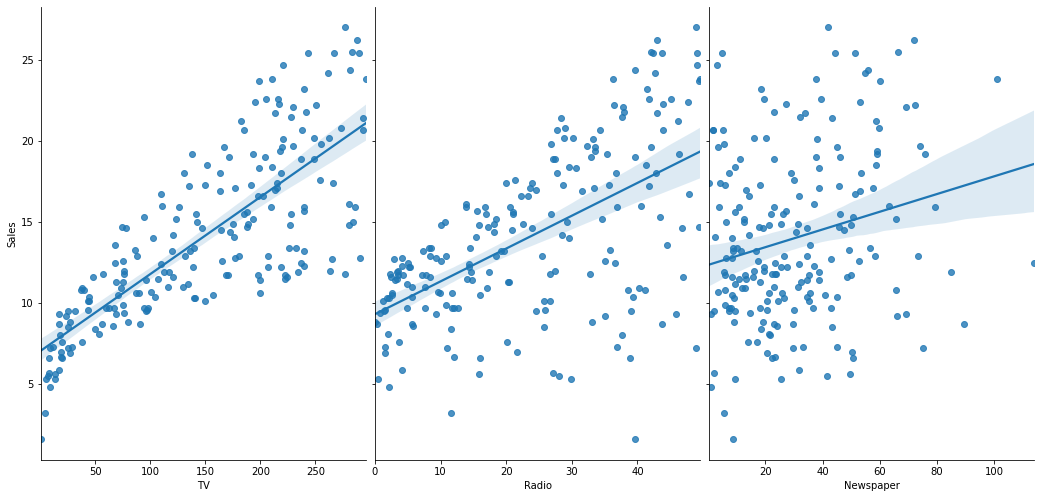

In [23]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

OLS Approach

In [24]:
import statsmodels.formula.api as sm
model = sm.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        18:34:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

1.The Adj. R-squared is 0.896, which means that almost 90 of all variations in our data can be     explained by our model.

2.The p-values for TV and radio are less than 0.000, but the p-value for newspaper is 0.86, which indicates that newspaper spend has no significant impact on sales.